# Python Project

In [7]:
# pip install mysql-connector-python

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('order_items.csv', 'order_items'),
    ('payments.csv', 'payments'),  # Added missing comma here
    ('geolocation.csv', 'geolocation')
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Sun5556@55',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:\\Users\\Sundram Mishra\\Desktop\\PYTHON PROJECTS'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()


Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64



KeyboardInterrupt: 

In [4]:
db=mysql.connector.connect(host="localhost",
                          username="root",
                          password="Sun5556@55",
                          database="ecommerce")
cur=db.cursor()

## 🐵Basic Queries

### 1. List all unique cities where customers are located.

In [30]:
query = """select distinct customer_city from customers"""
cur.execute(query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

### 2. Count the number of orders placed in 2017.

In [26]:
query = """ select count(*) total_orders from orders where year(order_purchase_timestamp) = 2017"""
cur.execute(query)
data = cur.fetchall()
print("Total orders placed in 2017 are",data[0][0])

Total orders placed in 2017 are 45101


### 3. Find the total sales per category.

In [110]:
query = """select upper(product_category), round(sum(payment_value),2)
from payments
join order_items using(order_id)
join products using(product_id)
group by product_category;"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=["Category","Sales"])
df

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


### 4. Calculate the percentage of orders that were paid in installments.

In [118]:
query = """select (sum(case when payment_installments>0 then 1 else 0 end)/count(*))*100 from payments"""
cur.execute(query)
data = cur.fetchall()
print(f'A total of {data[0][0]} orders were paid for in installments.')

A total of 99.9981 orders were paid for in installments.


### 5. Count the number of customers from each state.

In [248]:
query = """select customer_state, count(customer_id) from customers group by customer_state"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=["customer_state","customer_count"])
df

,customer_state,customer_count
0,SP,41746
1,SC,3637
2,MG,11635
3,PR,5045
4,RJ,12852
5,RS,5466
6,PA,975
7,GO,2020
8,ES,2033
9,BA,3380


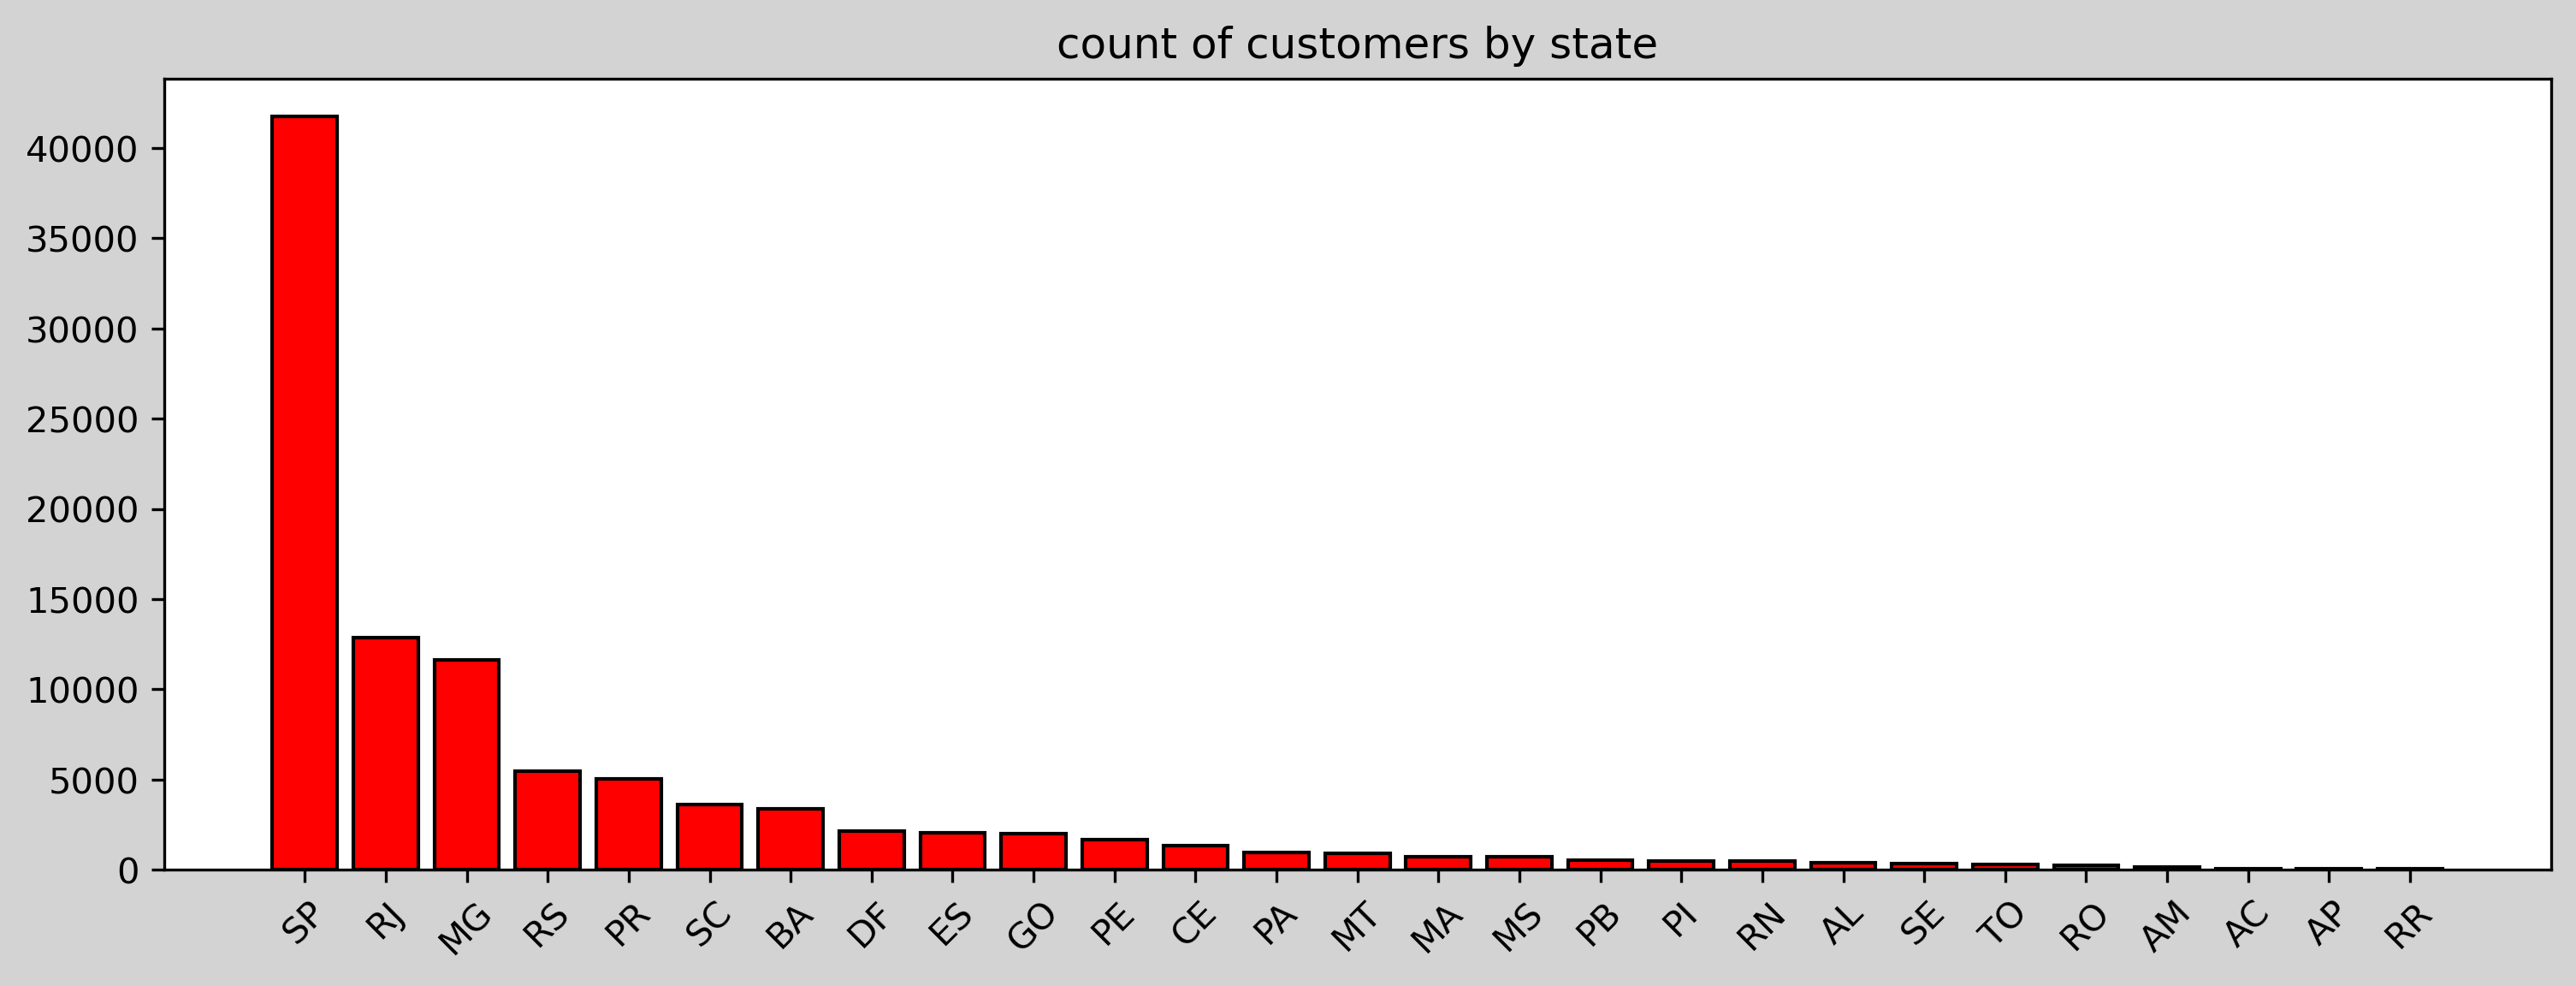

In [251]:
df=df.sort_values(by="customer_count",ascending=False)
plt.figure(num=11,facecolor="lightgrey",figsize=(12,4),dpi=300)
l=plt.bar(df["customer_state"],df["customer_count"],color="r",edgecolor="k")
plt.xticks(rotation=45)
plt.title("count of customers by state")
plt.show()

## 🙈Intermediate Queries

### 1. Calculate the number of orders per month in 2018.

In [253]:
query = """select concat(year(order_purchase_timestamp),"-",date_format(order_purchase_timestamp,'%b')) year_months, 
count(order_id) order_count from orders 
where year(order_purchase_timestamp)=2018
group by concat(year(order_purchase_timestamp),"-",date_format(order_purchase_timestamp,'%b'))"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=["year_month","order_count"])
df.sort_values(by="order_count")

,year_month,order_count
9,2018-Oct,4
8,2018-Sep,16
3,2018-Jun,6167
0,2018-Jul,6292
1,2018-Aug,6512
2,2018-Feb,6728
6,2018-May,6873
7,2018-Apr,6939
4,2018-Mar,7211
5,2018-Jan,7269


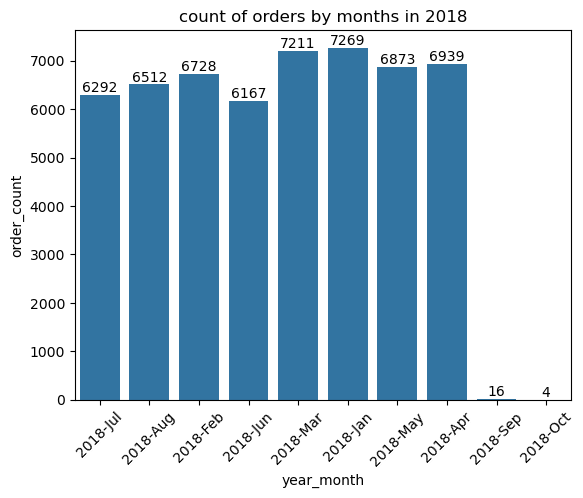

In [262]:
ax=sns.barplot(x=df["year_month"],y=df["order_count"],data=df)
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.title("count of orders by months in 2018")
plt.show()

### 2. Find the average number of products per order, grouped by customer city.

In [279]:
query = """with cte as
(select o.order_id, o.customer_id, count(oi.order_id) as order_count
from orders o join order_items oi using(order_id)
group by o.order_id, o.customer_id)
select c.customer_city, round(avg(cte.order_count),2) "avg. no. of products per order"
from customers c join cte using(customer_id)
group by c.customer_city 
order by round(avg(cte.order_count),2) desc;"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=["customer city","avg. no. of orders"])
df

,customer city,avg. no. of orders
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
...,...,...
4105,lagoa da canoa,1.00
4106,japaratuba,1.00
4107,sebastiao leal,1.00
4108,morro agudo de goias,1.00


### 3. Calculate the percentage of total revenue contributed by each product category.

In [281]:
query = """select product_category,ROUND((sum(pa.payment_value)/(select sum(payment_value) from payments))*100,2) revenue
from products p
join order_items o using(product_id)
join payments pa using(order_id)
group by product_category
order by revenue desc;"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data, columns=["product category","revenue"])
df

,product category,revenue
0,bed table bath,10.70
1,HEALTH BEAUTY,10.35
2,computer accessories,9.90
3,Furniture Decoration,8.93
4,Watches present,8.93
...,...,...
69,House Comfort 2,0.01
70,cds music dvds,0.01
71,PC Gamer,0.01
72,Fashion Children's Clothing,0.00


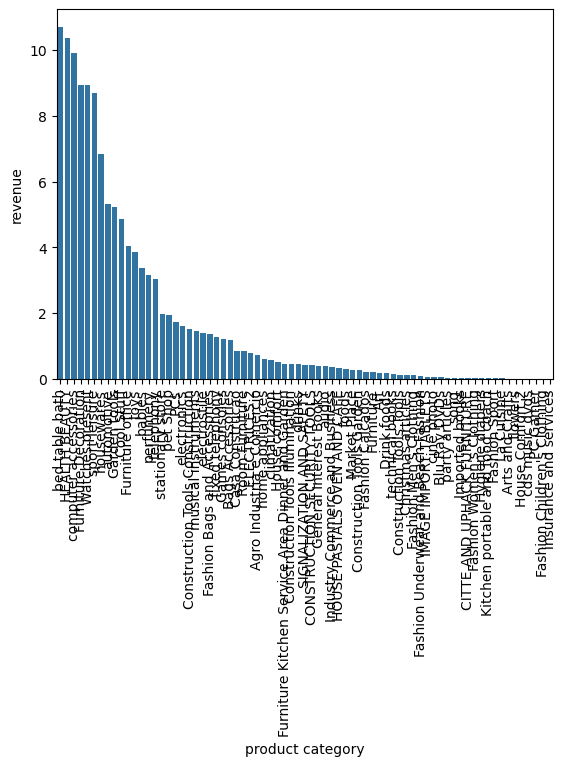

In [293]:
sns.barplot(x=df["product category"],y=df["revenue"])
plt.xticks(rotation=90)
plt.show()

### 4. Identify the correlation between product price and the number of times a product has been purchased.

In [ ]:
query = """select distinct customer_city from customers"""
cur.execute(query)
data = cur.fetchall()
data

### 5. Calculate the total revenue generated by each seller, and rank them by revenue.

In [318]:
query = """with cte as(
select s.seller_id,ROUND(sum(pa.payment_value),2) revenue
from sellers s
join order_items o using(seller_id)
join payments pa using(order_id)
group by s.seller_id)
select *, rank() over(order by revenue desc) from cte;"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=["seller ID","revenue","rank"])
df.head(10)

,seller ID,revenue,rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.91,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.04,2
2,4a3ca9315b744ce9f8e9374361493884,301245.27,3
3,1f50f920176fa81dab994f9023523100,290253.42,4
4,53243585a1d6dc2643021fd1853d8905,284903.08,5
5,da8622b14eb17ae2831f4ac5b9dab84a,272219.32,6
6,4869f7a5dfa277a7dca6462dcf3b52b2,264166.12,7
7,955fee9216a65b617aa5c0531780ce60,236322.30,8
8,fa1c13f2614d7b5c4749cbc52fecda94,206513.23,9
9,7e93a43ef30c4f03f38b393420bc753a,185134.21,10


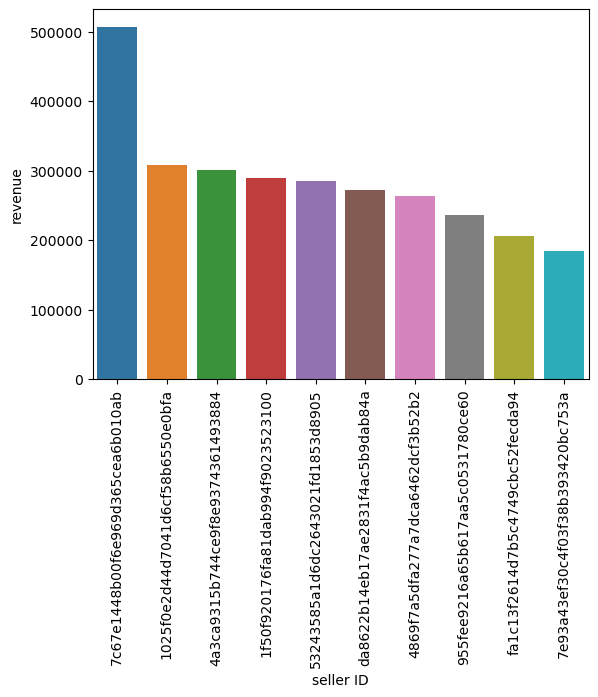

In [328]:
# df=df.head(10)
sns.barplot(x=df["seller ID"],y=df["revenue"],data=df,hue="seller ID")
plt.xticks(rotation=90)
plt.show()

## 🙉Advanced Queries

### 1. Calculate the moving average of order values for each customer over their order history.

In [7]:
query = """select customer_id, order_purchase_timestamp, payment,
round(avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row),2) as moving_avg
from
(select o.customer_id, o.order_purchase_timestamp,
p.payment_value as payment
from payments p join orders o
on p.order_id = o.order_id) as Q1;"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=["Order_ID","Order_Purchase_Timestamp","Payment","Moving_avg"])
df

,Order_ID,Order_Purchase_Timestamp,Payment,Moving_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.01
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,0.64,27.12
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.13
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.13
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.50


### 2. Calculate the cumulative sales per month for each year.

In [5]:
query = """select  year(order_purchase_timestamp) year, monthname(order_purchase_timestamp) month,
payment_value, sum(payment_value)
over(partition by year(order_purchase_timestamp),
monthname(order_purchase_timestamp) order by payment_value desc) cum_sum
from orders o join payments p using(order_id);"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=["Year","Month","Payment Value","Cum_Sum"])
df

,Year,Month,Payment Value,Cum_Sum
0,2016,December,19.62,19.620001
1,2016,October,1423.55,1423.550049
2,2016,October,1400.74,2824.290039
3,2016,October,1227.78,4052.070068
4,2016,October,982.41,5034.480042
...,...,...,...,...
103881,2018,September,84.58,4318.910133
103882,2018,September,84.58,4318.910133
103883,2018,September,69.46,4388.370132
103884,2018,September,51.17,4439.540131


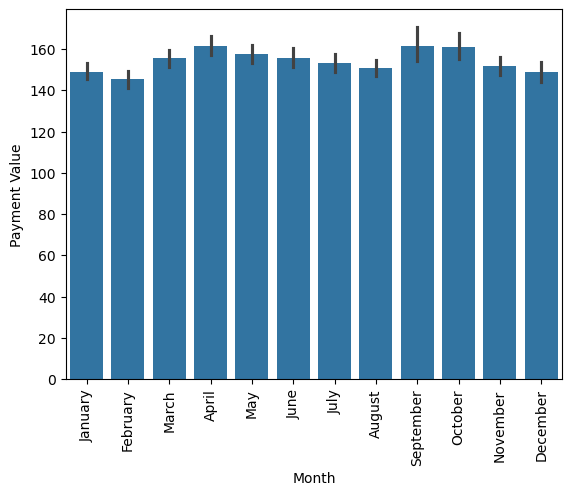

In [16]:
o = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sns.barplot(x=df["Month"],y=df["Payment Value"],data=df,order=o)
plt.xticks(rotation=90)
plt.show()

### 3. Calculate the year-over-year growth rate of total sales.

In [13]:
query = """with ctee as (
with cte as (
select year(o.order_purchase_timestamp) years, round(sum(payment_value),2) sales from orders o join payments p using(order_id)
group by years order by years)
select *, lag(sales) over() previous_year_sale from cte)
select *, round(((sales-previous_year_sale)/previous_year_sale)*100,2) "YOY % Growth" from ctee;"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data, columns=["Year","sales","Previous year sale","YOY % Growth"])
df

,Year,sales,Previous year sale,YOY % Growth
0,2016,59362.34,NaN,NaN
1,2017,7249746.73,59362.34,12112.7
2,2018,8699763.05,7249746.73,20.0


### 4. Identify the top 3 customers who spent the most money in each year.

In [15]:
query = """with cte as (
select c.customer_id customers, year(o.order_purchase_timestamp) years, p.payment_value payment,
rank() over(partition by year(o.order_purchase_timestamp) order by p.payment_value desc) rk
from orders o 
join payments p using(order_id)
join customers c using(customer_id)
group by years, payment,customers)
select * from cte where rk<=3;"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=["Customers","Years","Payment","Rank"])
df

,Customers,Years,Payment,Rank
0,a9dc96b027d1252bbac0a9b72d837fc6,2016,1423.55,1
1,1d34ed25963d5aae4cf3d7f3a4cda173,2016,1400.74,2
2,4a06381959b6670756de02e07b83815f,2016,1227.78,3
3,1617b1357756262bfa56ab541c47bc16,2017,13664.10,1
4,c6e2731c5b391845f6800c97401a43a9,2017,6929.31,2
5,3fd6777bbce08a352fddd04e4a7cc8f6,2017,6726.66,3
6,ec5b2ba62e574342386871631fafd3fc,2018,7274.88,1
7,f48d464a0baaea338cb25f816991ab1f,2018,6922.21,2
8,e0a2412720e9ea4f26c1ac985f6a7358,2018,4809.44,3


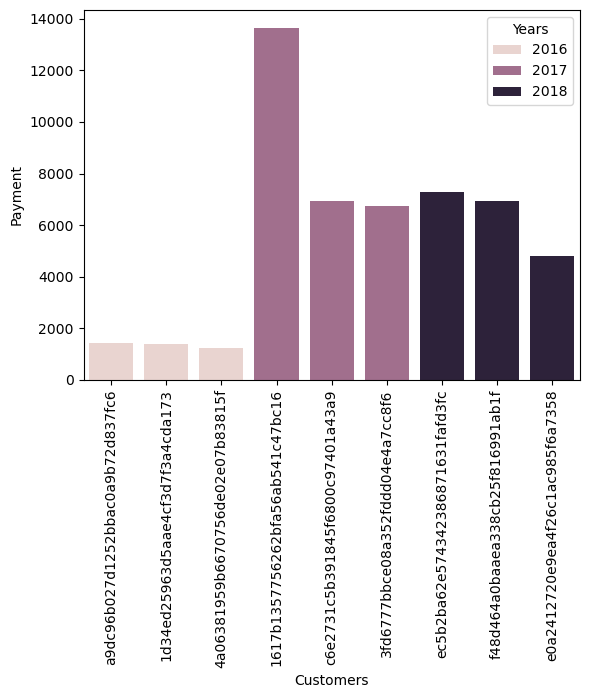

In [21]:
sns.barplot(x="Customers",y="Payment",data=df,hue="Years")
plt.xticks(rotation=90)
plt.show()

In [61]:
pd.set_option('display.max_rows', None)  # None means no limit

In [78]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')